# NYU CUSP PUI
# HW3 Assignment1
# Author is Cheng Ma @cm4692

### GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
### Describe the behavior you see in the plots in terms of the law of large numbers.
### PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing 
### Extra Credit: FIT a gaussian to the distribution of means

# TIPS:
# I finished the Extra Credit Mission with the last step of every distribution.

In [1]:
from __future__ import print_function
__author__= 'cm'

import matplotlib.pyplot as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%matplotlib inline


In [2]:
pl.style.use('ggplot')

# choose chi-squared as first

In [3]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [27]:
mymean = 50.

In [28]:
df = mymean

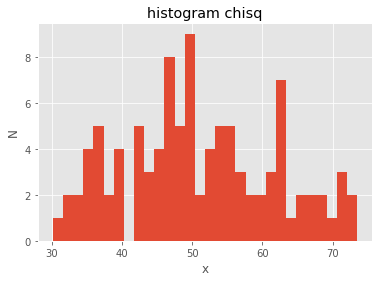

In [29]:
import numpy as np
md = {}

md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('histogram chisq')

## Figure 1: Chi sq distribution: df = 100, N=100

In [30]:
print ("Chisq mean: %.2f, Chisq stdev: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 50.88, Chisq stdev: 10.74


# find a size for each sample

In [31]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(0.1,1,100) * 1000).astype(int)
#np.random.random_integers(1,200,100)
#mysize = np.random.randint(1,2000,100)
print (mysize)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20]


#  now plot the sample mean  against the sample size N.

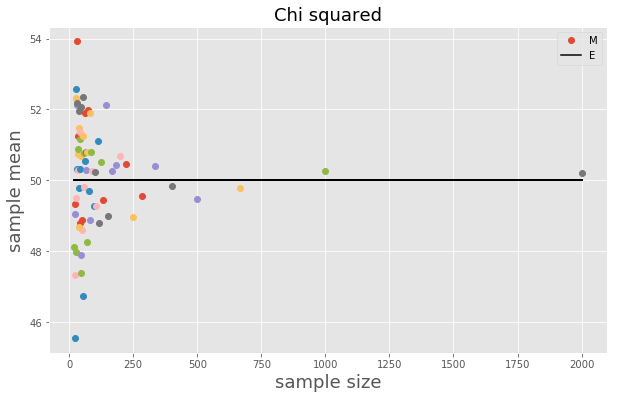

In [32]:
md['chisq'] = {}
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
md['chisq']['means'] = {}
axchisq = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md['chisq']:
    if not type(m) == str:
        md['chisq']['means'][m] = md['chisq'][m].mean()
        #and plot it
        axchisq.plot(m, md['chisq']['means'][m], 'o')
        axchisq.set_xlabel('sample size', fontsize=18)
        axchisq.set_ylabel('sample mean', fontsize=18)
        axchisq.set_title('Chi squared', fontsize=18)
        axchisq.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq.legend('ME',loc="upper right")
# M means mean
# E means expect

## Figure 1a: The law of large numbers- with sizes get larger, sample means  are converging to what they are expected to be. (Chi-squared)

# PLOT the distributions of all sample means.
# fit this distribution to gaussian distribution.

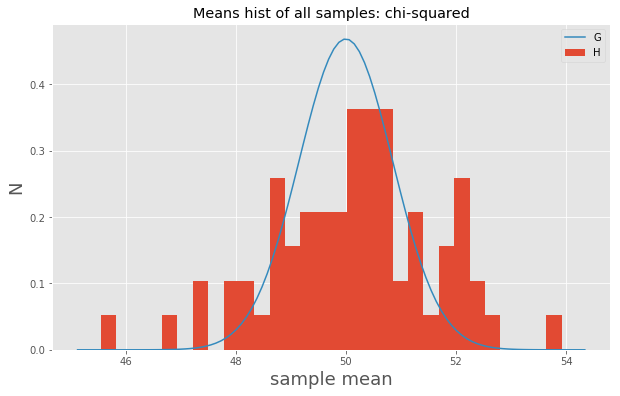

In [34]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Law of large numbers
#Mandatory: as a histogram
allmeans = list(md['chisq']['means'].values())

fitnorm1=pl.figure(figsize=(10,6)).add_subplot(111)

#pl.figure(figsize=(10, 10))
fitnorm1.hist(allmeans,bins=30,normed=True)
fitnorm1.set_xlabel('sample mean', fontsize = 18)
fitnorm1.set_ylabel('N', fontsize = 18)
fitnorm1.set_title('Means hist of all samples: chi-squared')
#Extra credit:FIT a gaussian to the distribution of means
#fitnorm.
array = np.asarray(allmeans)
#mean,std=norm.fit(array)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, 50, np.sqrt(50./len(allmeans)))
fitnorm1.plot(x, y)

fitnorm1.legend("GH",loc="upper right")
# G means gaussian distribution
# H means histogram of sample means

## Figure 1b: PLOT the distributions of all sample means as a histogram and fit it with the Gaussian distribution. (Extra Credit)
## The law of large numbers- with sizes get larger, sample means are converging to what they are expected to be. 
## Central Limit Theorem- The distribution of large size samples approximates Gaussian distribution.

# 2nd - Gaussian Distribution

In [11]:
distributions = ['gaus']

In [12]:
mymean=50

# find a size N for each sample

# now plot the sample mean against the sample size N.

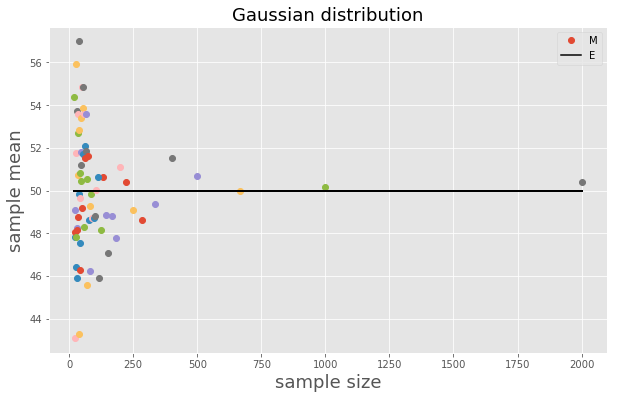

In [13]:
md['gaus'] = {}
for n in mysize:
    md['gaus'][n] = np.random.normal(mymean,20 ,size = n)
    
md['gaus']['means'] = {}
axgaus = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md['gaus']:
    if not type(m) == str:
        md['gaus']['means'][m] = md['gaus'][m].mean()
        #and plot it
        axgaus.plot(m, md['gaus']['means'][m], 'o')
        
        axgaus.set_xlabel('sample size', fontsize=18)
        axgaus.set_ylabel('sample mean', fontsize=18)
        axgaus.set_title('Gaussian distribution', fontsize=18)
        axgaus.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axgaus.legend('ME',loc="upper right")
# M means mean
# E means expect

## Figure 2a: The law of large numbers- with sizes get larger, sample means  are converging to what they are expected to be. (Gaussian )

# PLOT the distributions of all sample means.
# fit this distribution to gaussian distribution.

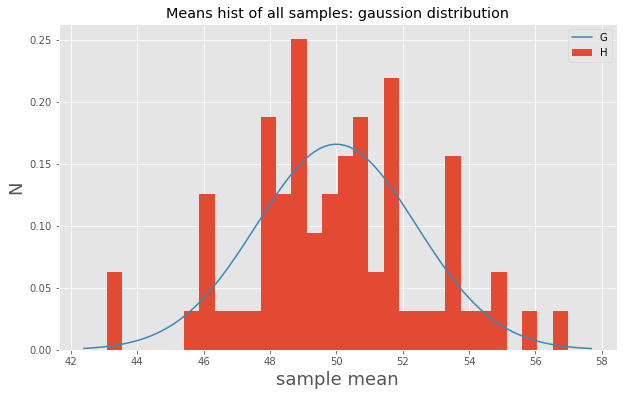

In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Law of large numbers
#Mandatory: as a histogram
allmeans2 = list(md['gaus']['means'].values())

fitnorm2=pl.figure(figsize=(10,6)).add_subplot(111)

#pl.figure(figsize=(10, 10))
fitnorm2.hist(allmeans2,bins=30,normed=True)
fitnorm2.set_xlabel('sample mean', fontsize = 18)
fitnorm2.set_ylabel('N', fontsize = 18)
fitnorm2.set_title('Means hist of all samples: gaussion distribution')
#Extra credit:FIT a gaussian to the distribution of means
#fitnorm.
mu=50
sigma=20
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x,mu,sigma/np.sqrt(len(allmeans2)))
fitnorm2.plot(x, y)

fitnorm2.legend("GH",loc="upper right")
# G means gaussian distribution
# H means histogram of sample means

## Figure 2b: PLOT the distributions of all sample means as a histogram and fit it with the Gaussian distribution. (Extra Credit)
## The law of large numbers- with sizes get larger, sample means are converging to what they are expected to be. 
## Central Limit Theorem- The distribution of large size samples approximates Gaussian distribution.

# 3rd - Poisson Distribution

In [15]:
distributions = ['pois']
mymean=50

# find a size n for each sample

In [16]:
mysize = np.random.randint(1,200,100) * 10
print (mysize)

[1600 1990  800  530 1320 1430 1390  610 1610  250 1790 1160  590 1580 1700
  600 1040  510 1930  740 1730  280   30  910 1120  980  260  430 1580 1980
  690 1250 1230  300 1810 1450 1600 1310 1610  500  520  440   30  340  270
 1670  420  770 1110  740  670 1000 1240  230 1980  660  780  280  390  690
 1040 1410 1910  740  950 1990 1360 1330 1390  750 1030  260 1110 1640 1040
 1550 1600 1510 1970   30 1380 1650  740  140 1360  740 1620  800  930  200
  430  290 1420 1170 1100  330  360 1970 1330  800]


# now plot the sample mean against the sample size N

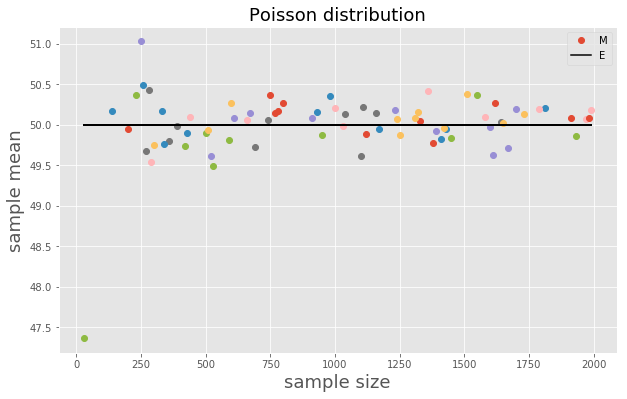

In [17]:
md['pois'] = {}
for n in mysize:
    md['pois'][n] = np.random.poisson(mymean ,size = n)
    
md['pois']['means'] = {}
axpois = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md['pois']:
    if not type(m) == str:
        md['pois']['means'][m] = md['pois'][m].mean()
        #and plot it
        axpois.plot(m, md['pois']['means'][m], 'o')
        
        axpois.set_xlabel('sample size', fontsize=18)
        axpois.set_ylabel('sample mean', fontsize=18)
        axpois.set_title('Poisson distribution', fontsize=18)
        axpois.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axpois.legend('ME',loc="upper right")
# M means mean
# E means expect

## Figure 3a: The law of large numbers- with sizes get larger, sample means  are converging to what they are expected to be. (Poisson)

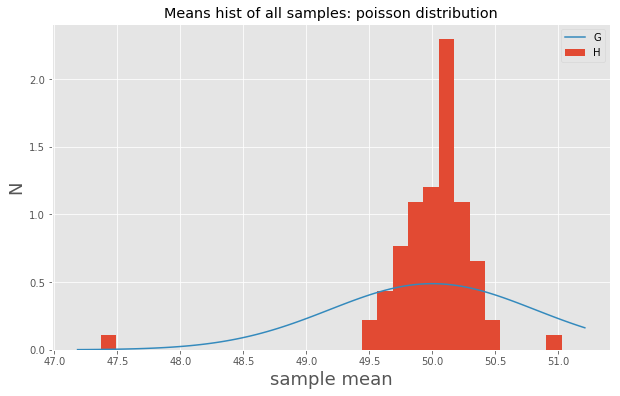

In [18]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Law of large numbers
#Mandatory: as a histogram
allmeans3 = list(md['pois']['means'].values())

fitnorm3=pl.figure(figsize=(10,6)).add_subplot(111)

#pl.figure(figsize=(10, 10))
fitnorm3.hist(allmeans3,bins=30,normed=True)
fitnorm3.set_xlabel('sample mean', fontsize = 18)
fitnorm3.set_ylabel('N', fontsize = 18)
fitnorm3.set_title('Means hist of all samples: poisson distribution')
#Extra credit:FIT a gaussian to the distribution of means
#fitnorm.
lamda=50
sigma=np.sqrt(lamda)
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
#y = norm.pdf(x,lamda,/np.sqrt(len(allmeans3)))
y = norm.pdf(x,lamda,np.sqrt(lamda/float(len(allmeans3))))
fitnorm3.plot(x, y)

fitnorm3.legend("GH",loc="upper right")
# G means gaussian distribution
# H means histogram of sample means

## Figure 3b: PLOT the distributions of all sample means as a histogram and fit it with the Gaussian distribution. (Extra Credit)
## The law of large numbers- with sizes get larger, sample means are converging to what they are expected to be. 
## Central Limit Theorem- The distribution of large size samples approximates Gaussian distribution.

# 4th - Binomial Distribution

In [19]:
distributions = ['bino']

# expect of bino is n*p, to make expect equals to 50, i set the mymean1=100

In [20]:
mymean1=100

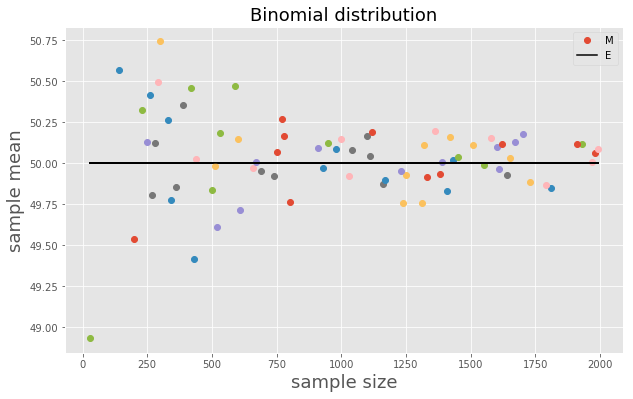

In [21]:
md['bino'] = {}
for n in mysize:
    md['bino'][n] = np.random.binomial(mymean1,0.5,size = n)
    
md['bino']['means'] = {}
axbino = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md['bino']:
    if not type(m) == str:
        md['bino']['means'][m] = md['bino'][m].mean()
        #and plot it
        axbino.plot(m, md['bino']['means'][m], 'o')
        
        axbino.set_xlabel('sample size', fontsize=18)
        axbino.set_ylabel('sample mean', fontsize=18)
        axbino.set_title('Binomial distribution', fontsize=18)
        axbino.plot([min(mysize), max(mysize)], [mymean1/2, mymean1/2], 'k')
axbino.legend('ME',loc="upper right")
# M means mean
# E means expect

## Figure 4a: The law of large numbers- with sizes get larger, sample means  are converging to what they are expected to be. (Binomial)

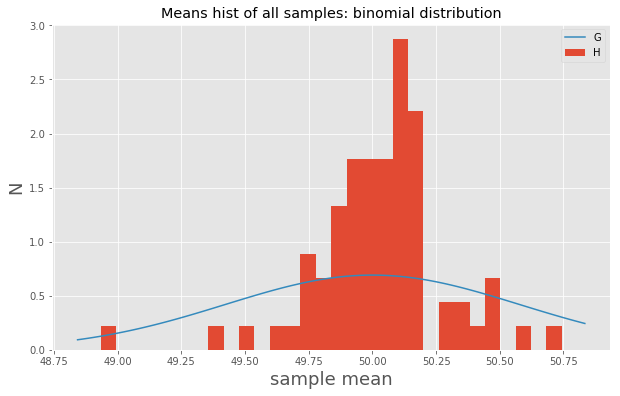

In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Law of large numbers
#Mandatory: as a histogram
allmeans4 = list(md['bino']['means'].values())

fitnorm4=pl.figure(figsize=(10,6)).add_subplot(111)

#pl.figure(figsize=(10, 10))
fitnorm4.hist(allmeans4,bins=30,normed=True)
fitnorm4.set_xlabel('sample mean', fontsize = 18)
fitnorm4.set_ylabel('N', fontsize = 18)
fitnorm4.set_title('Means hist of all samples: binomial distribution')
#Extra credit:FIT a gaussian to the distribution of means
#fitnorm.
mu=mymean1*0.5
sigma=np.sqrt((mymean1*0.5*0.5)/len(allmeans4))
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
#y = norm.pdf(x,lamda,/np.sqrt(len(allmeans3)))
y = norm.pdf(x,mu,sigma)
fitnorm4.plot(x, y)

fitnorm4.legend("GH",loc="upper right")
# G means gaussian distribution
# H means histogram of sample means

## Figure 4b: PLOT the distributions of all sample means as a histogram and fit it with the Gaussian distribution. (Extra Credit)
## The law of large numbers- with sizes get larger, sample means are converging to what they are expected to be. 
## Central Limit Theorem- The distribution of large size samples approximates Gaussian distribution.

#  5th- Beta Distribution
#  mean = a/(a+b)
#  var= ab/((a+b)^2 * (a+b+1)

In [23]:
distributions = ['bino']

In [24]:
a=2.
b=2.

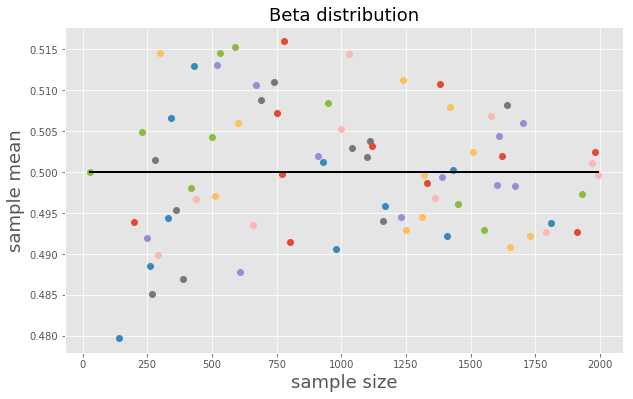

In [25]:
md['beta'] = {}
for n in mysize:
    md['beta'][n] = np.random.beta(a,b ,size = n)
    
md['beta']['means'] = {}
axbeta = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md['beta']:
    if not type(m) == str:
        md['beta']['means'][m] = md['beta'][m].mean()
        #and plot it
        axbeta.plot(m, md['beta']['means'][m], 'o')
        
        axbeta.set_xlabel('sample size', fontsize=18)
        axbeta.set_ylabel('sample mean', fontsize=18)
        axbeta.set_title('Beta distribution', fontsize=18)
        axbeta.plot([min(mysize), max(mysize)], [float(a)/(a+b), float(a)/(a+b)], 'k')
axpois.legend('ME',loc="upper right")
# M means mean
# E means expect

## Figure 5a: The law of large numbers- with sizes get larger, sample means  are converging to what they are expected to be. (Beta)

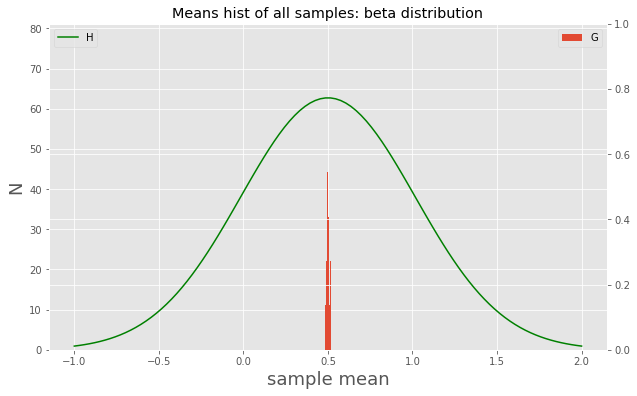

In [26]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Law of large numbers
#Mandatory: as a histogram
allmeans5 = list(md['beta']['means'].values())

fitnorm5=pl.figure(figsize=(10,6)).add_subplot(111)
fitnorm6=fitnorm5.twinx()
#pl.figure(figsize=(10, 10))
fitnorm5.hist(allmeans5,bins=30,normed=True)
fitnorm5.set_xlabel('sample mean', fontsize = 18)
fitnorm5.set_ylabel('N', fontsize = 18)
fitnorm5.set_title('Means hist of all samples: beta distribution')
#Extra credit:FIT a gaussian to the distribution of means
#fitnorm.
mu=float(a)/(a+b)
sigma=np.sqrt((a*b)/(a+b)*(a+b)*(a+b+1)/len(allmeans5))

xmin, xmax = pl.xlim()
x = np.linspace(-1, 2, 100)
#y = norm.pdf(x,lamda,/np.sqrt(len(allmeans3)))
y = norm.pdf(x,mu,sigma)
fitnorm6.plot(x, y,'g')
fitnorm6.set_ylim([0.0,1])
#fitnorm5.set_xlim([-5,5])


fitnorm5.legend("G",loc="upper right")
fitnorm6.legend("H",loc="upper left")
# G means gaussian distribution
# H means histogram of sample means

## Figure 5b: PLOT the distributions of all sample means as a histogram and fit it with the Gaussian distribution. (Extra Credit)
## The law of large numbers- with sizes get larger, sample means are converging to what they are expected to be. 
## Central Limit Theorem- The distribution of large size samples approximates Gaussian distribution.